Author: Rodrigo MM Santiago @rodrigommsantiago

In [1]:
# Modules
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# inline plotting
%matplotlib inline 

import pylab as pl          # animations
from IPython import display # display tools
from time import sleep      # pausing function

Convolutions:

(0, 8)

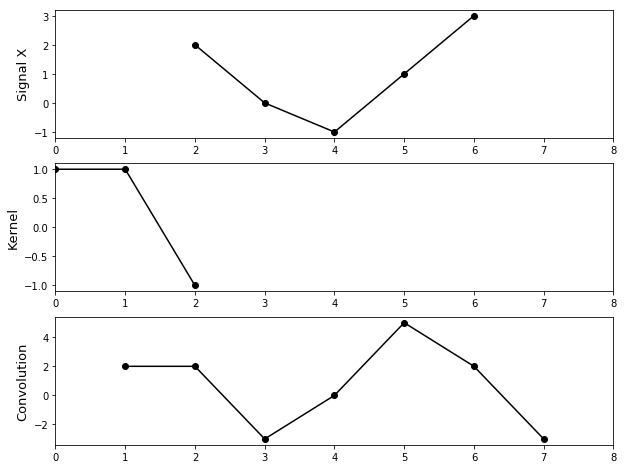

In [2]:
X = [2,0,-1,1,3]
K = [1,1,-1]

plt.figure(figsize=(10,8))
plt.subplot(311)
plt.plot(range(2,7),X,'ko-')
plt.ylabel('Signal X',size=13)
plt.xlim([0,8])

plt.subplot(312)
plt.plot(K,'ko-')
plt.ylabel('Kernel',size=13)
plt.xlim([0,8])

ConvXK = np.convolve(X,K)

plt.subplot(313)
plt.plot(range(1,8),ConvXK,'ko-')
plt.ylabel('Convolution',size=13)
plt.xlim([0,8])

Smoothing a signal using convolution:

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


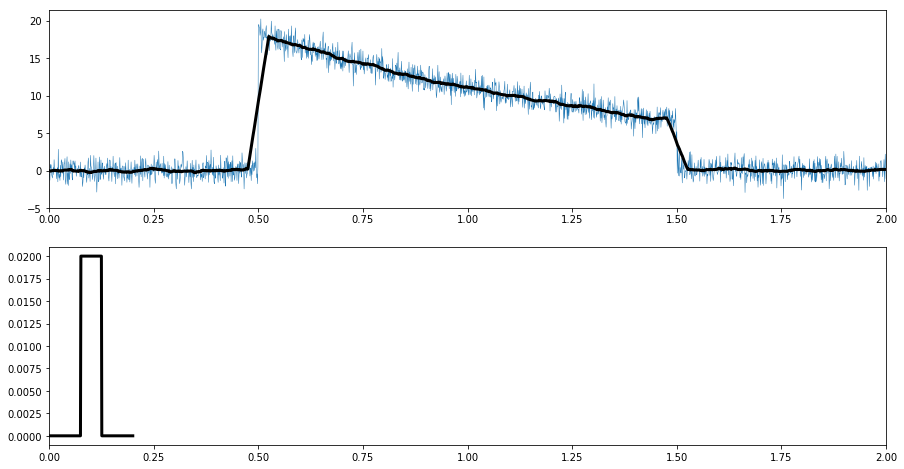

In [3]:
srate = 1000
dt = 1./srate
t = np.arange(dt,2.0001,dt)

LFP = np.random.randn(len(t))
LFP[499:1500] = LFP[499:1500]+30*np.exp(-t[499:1500])

plt.figure(figsize=(15,8))

plt.subplot(211)
plt.plot(t,LFP,linewidth=0.5)
plt.xlim([0,2])

K = np.zeros(200)
K[75:125] = 1
K = K/sum(K)

plt.subplot(212)
plt.plot(t[:200],K,'k',linewidth=3)
plt.xlim([0,2]);

ConvLFP = np.convolve(LFP,K)

plt.subplot(211)
plt.plot(t,ConvLFP[99:-100],'k',linewidth=3);

Applying convolution as a filter:

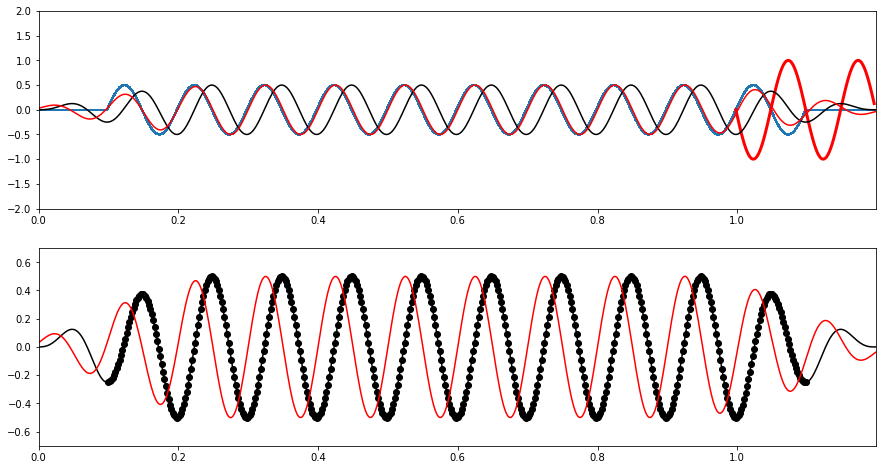

In [4]:
srate = 500
dt = 1./srate
t = np.arange(dt,1.0001,dt)

LFP = 0.5*np.sin(2*np.pi*10*t)

order = 100
K = np.sin(2*np.pi*10*t[:order])
norm = np.sum(K**2) # normalization factor (don't add or lose energy)

plt.figure(figsize=(15,8))

# zero padding
LFP = np.hstack((np.zeros(order/2),LFP,np.zeros(order/2)))
t = dt*np.arange(len(LFP))

for j in range(len(LFP)-order):
    
    plt.subplot(211)
    plt.plot(t,LFP,'C0')
    line = plt.plot(t[j:order+j],K[::-1],'r',linewidth=3)
    plt.ylim([-2.,2.0])
    plt.xlim([0,t[-1]])
    
    plt.subplot(212)
    plt.plot(t[order/2+j],np.sum(K[::-1]*LFP[j:order+j])/norm,'ko')
    plt.ylim([-.7,.7])
    plt.xlim([0,t[-1]])
    display.display(pl.gcf())
    display.clear_output(wait=True)
    if j < len(LFP)-order-1:
        line[-1].remove()
        
convol1 = np.convolve(LFP,K/norm,'same')
convol2 = np.convolve(convol1,K[::-1]/norm,'same')

plt.subplot(211)
plt.plot(t,convol1,'k')
plt.plot(t,convol2,'r')

plt.subplot(212)
plt.plot(t,convol1,'k')
plt.plot(t,convol2,'r');